In [127]:
# pandas, numpy, pyplot 라이브러리 가져오기
import pandas as pd # 데이터 생성
import numpy as np # 수학연산, 숫자데이터 생성
import matplotlib.pyplot as plt # 시각화

#### < 데이터셋 개요>
- Survived: 생존 여부
    - 0 = No
    - 1 = Yes
- pclass: 티켓 등급
    - 1 = 1st
    - 2 = 2nd
    - 3 = 3rd
- Sex: 성별
- Age: 나이
- Sibsp: 함께 탑승한 형제자매, 배우자의 수
- Parch: 함께 탑승한 부모, 자식의 수
- Ticket: 티켓 번호
- Name : 이름, 사회적등급
- Fare: 운임
- Cabin: 객실 번호
- Embarked: 탑승 항구
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

#### 데이터 적재

In [128]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
# 컬럼을 소문자로 만들어주세요
#1) .rename 활용
data.rename(columns=str.lower , inplace=True)
data

#2) data.columns = data.columns.str.lower()

#3) data.columns = data.columns.map(str.lower)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 결측치 확인
- 컬럼별 갯수
- 데이터셋의 크기가 작은 경우는 결측치가 있는 레코드를 삭제하지 않는다.
    - 대체하는 방식으로 전처리
    

In [130]:
data.shape

(891, 12)

In [131]:
# data.isnull()은 값이 있으면 False, 없으면 True를 셀에 배치하는데
# 파이썬 특성상 True는 1로 간주하고 False는 0으로 간주하므로
# isnull()에 대해 총합을 구하면, 결측치 개수를 구할 수 있습니다.
data.isnull().sum() / 891 * 100

passengerid     0.000000
survived        0.000000
pclass          0.000000
name            0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
ticket          0.000000
fare            0.000000
cabin          77.104377
embarked        0.224467
dtype: float64

#### 불필요한 변수 제거
- ticket

In [132]:
# ticket 컬럼 제거
## drop제거 (axis=1, inplace=True)
data.drop('ticket', axis=1, inplace=True)

# del 제거
## del data['ticket']

In [133]:
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [134]:
# ticket 컬럼을 누락시킨 csv 파일을 외부로 빼내기
# ticket_deleted_titanic.csv
# 단, 그냥 to_csv를 할 경우는 자동으로 csv에 로우명을 매겨주기 때문에
# 추후 다시 import 할때 Unnamed : 0 컬럼이 들어옵니다.
# 이를 방지하기 위해 index=False를 줄 수있습니다.
data.to_csv('data/ticket_deleted_titanic.csv', index=False)

#### Cabin 데이터를 활용하여 유도변수 생성

- 개별 객실 번호는 의미가 없음(123, 456 ...)
- cabin 데이터의 첫 글자가 deck(구역)을 의미
- 유도변수 : deck컬럼 추가
- deck 컬럼에 추가될 자료 : A, B, C, D, E, F, G, T, unknown

    - cabin 컬럼의 각 값에 적용할 처리
        - 1)
            - 값의 첫 번째 문자가 deck list에 있으면 해당 deck을 반환
            - 없으면(NaN) deck list의 unknown 반환
        - 2)
            - 첫 번째 문자 반환
            - 없으면 다른 것 반환

In [135]:
# NaN
# 1. type = float
# 2. 다른 값으로 대체해서 처리
# 3. str으로 변경

In [136]:
deck_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'unknown']
sample = ['C123', np.nan, 'D201', np.nan, 'F999']
# result = ['C', 'unknown', 'D', 'unknown', 'F']

In [137]:
type(np.NaN)

float

In [138]:
# 함수를 정의해서 .apply나 map을 통해 유도변수로 교체해주세요.
# 함수를 정의해서, apply나 map을 통해 유도변수로 교체해주세요.
def cabin_to_deck(value):
    deck_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'unknown']
    # NaN인지 검사
    if type(value)==type(np.nan):
        return 'unknown'
    # NaN가 아니면 덱 종류만 리턴
    elif value[0] in deck_list:
    # 덱 리스트에 분류된 덱이 맞는지 체크
        return value[0]
    else:
        return 'unknown'

In [139]:
# 컬럼명은 'deck' 으로 해 주세요.
data['deck'] = data['cabin'].map(cabin_to_deck)
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,unknown
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,C


#### Name 데이터를 활용하여 유도변수 생성

- 개별 이름은 모델 예측에 유의미한 변수가 아니다.
- 대표 특성을 찾을 수 있는 범주 데이터를 추출할 수 있다.
- Mr, Ms, Miss, Master ...
- 추출 하여 title 컬럼으로 추가
- 첫번째 방법. split() 두번 사용하여 처리
- 두번째 방법. 정규식을 사용하여 처리
    - ver1
        - 정규식 패턴 생성에 사용할 문자열 : Sir, Mr, Don, Major, Capt, Jonkheer, Rev, Col, Dr, Mrs, Countess, Dona, Mme, Ms, Miss, Mlle, Master
        - 정규식 사용 순서 : 원본 문자열에서 split 결과의 1번 인덱스 값
    - ver2
        - 정규식 패턴 : [a-zA-Z]+\.

In [160]:
# split을 활용해서 name컬럼의 값들을 칭호만 남겨서 저장해주세요.
# 새로운 컬럼인 splited_name 컬럼에 저장 해주시면 됩니다.
def name_split(value):
    return value.split(", ")[1].split(".")[0]

In [161]:
data['splited_name'] = data['name'].apply(name_split)

In [206]:
data['splited_name']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: splited_name, Length: 891, dtype: object

In [207]:
data['splited_name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [208]:
# 정규표현식 사용을 위해 importe re실행
# regular expression(정규 표현식)
import re

In [209]:
# 정규표현식은 re.compile('내부 패턴', re.I)를 이용하면 해당 단어만 뽑아줍니다.
# 이를 위해서 반드시 먼저 import re 가 실행되어 있어야 합니다.
# 단어 리스트를 가지고 정규식 패턴 적용
def get_title(name):
    # 둘 이상의 단어를 타겟으로 잡을때는 |(쉬프트 + 역슬래시)를 사용합니다.
    pattern = re.compile('Sir|Mrs|Don|Major|Capt|Jonkheer|Rev|Col|Dr|Mr|Countess|Dona|Mme|Ms|Miss|Mlle|Master', re.I)
    # 정규식변수.search(타겟) => 타겟에서 패턴에 해당하는 자료가 있는지 조사
    result = pattern.search(name)
    if result:
        return result.group().lower()
    else:
        str(np.nan)

In [222]:
# 위 정규식 실행 함수를 name에 적용하면 호칭만 뽑혀나옴
data['title'] = data['name'].apply(get_title)
data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked,deck,splited_name,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,unknown,Mr,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,Mrs,mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,unknown,Miss,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,Mrs,mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,unknown,Mr,mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,unknown,Rev,rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,B,Miss,miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,unknown,Miss,miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,C,Mr,mr


In [223]:
# re를 사용하지 않는 경우는 팬더스에서 .str.extract('패턴')를 사용한다.
# expand=False를 주지 않으면 DataFrame형으로 나옴
data['name'].str.extract('([a-zA-Z]+)\.', expand=False)


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: name, Length: 891, dtype: object

In [224]:
# 호칭별 개수
data['title'].value_counts()

mr          493
miss        177
mrs         123
master       39
dr           16
col          12
ms            8
rev           6
don           4
mme           4
sir           2
major         2
mlle          2
capt          1
countess      1
jonkheer      1
Name: title, dtype: int64

### Name 데이터를 활용하여 생성한 유도변수 처리
* 범주 재설정

    capt - Officer
    
    col - Officer
    
    major - Officer
    
    dr - Officer
    
    jonkheer - Royalty
    
    rev - Officer
    
    countess - Royalty
    
    dona - Royalty
    
    lady - Royalty
    
    don - Royalty
    
    sir - Officer
    
    mr - Mr
    
    mme - Mrs
    
    ms - Mrs
    
    mrs - Mrs
    
    miss - Miss
    
    mlle - Miss
    
    master - Master
   
    nan - Mr(최빈값)
    

In [225]:
title_map = {
    "capt":"Officer",
    "col":"Officer",
    "major":"Officer",
    "dr":"Officer",
    "jonkheer":"Royalty",
    "rev":"Officer",
    "countess":"Royalty",
    "dona":"Royalty",
    "lady":"Royalty",
    "don":"Royalty",
    'sir' : 'Officer',
    "mr":"Mr",
    "mme":"Mrs",
    "ms":"Mrs",
    "mrs":"Mrs",
    "miss":"Miss",
    "mlle":"Miss",
    "master":"Master",
    "nan":"Mr"}

In [226]:
# data['title'] 에 들어있던 요소를 위의 규칙을 따라서 내부요소 변경해주기
data['title'] = data['title'].map(title_map)
data['title']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
        ...   
886    Officer
887       Miss
888       Miss
889         Mr
890         Mr
Name: title, Length: 891, dtype: object

#### 결측치 처리 - Age

- 미성년(Master, Miss)
- title 별 평균으로 age 결측치 대체
- transform
- (참고)사용자정의함수 : 매개변수 3개(타이틀별평균, 데이터, 타이틀리스트)

In [227]:
# age 컬럼 중 null이 들어온 컬럼 개수를 구해주세요
data.age.isnull().sum()

177

In [228]:
# df['col'].transform(mean)
# df['col'].mean()
# df['col'].apply(lamba x : mean(x))
# df['col'].apply(함수)

In [234]:
# title 별 age의 평균값
# 그룹바이를 이용해 'title' 컬럼값별 나이 평균을 구해주세요.
data.groupby('title')[['age']].mean()

,age
title,
Master,4.362000
Miss,21.555556
Mr,32.346457
Mrs,35.659292
Officer,37.742857
Royalty,45.666667


In [237]:
# groupby 다음 사용하는 transform은 기존 값을 무시하고, 집계함수값으로 대체합니다.
data.groupby('title')['age'].transform('mean')
# title 컬럼을 기준으로 묶은 자료들의 'age' 컬럼 평균치로
# 원래 'age'에 있던 결측치를 대신하기 위해 fillna를 써서 채워주세요.
# data['age'].fillna(data.groupby('title')[['age']].transform('mean'),inplace=True)

0      32.346457
1      35.659292
2      21.555556
3      35.659292
4      32.346457
         ...    
886    37.742857
887    21.555556
888    21.555556
889    32.346457
890    32.346457
Name: age, Length: 891, dtype: float64

In [239]:
# 결측치가 사라졌는데 isnull().sum()으로 확인해주세요.
data['age'].isnull().sum()

177

#### Age 데이터를 범주형 데이터로 변경

- 나이 숫자값 자체로는 의미가 적다.
- 연령대로 구분하는 것이 더 의미가 있는 구분값
- 구간
    - ~ 20
    - 20 ~ 40
    - 40 ~ 60
    - 60 ~
- 개수 : 4개

In [256]:
# 사용자 정의함수
def age_class(value):
    if value <=20:
        return 'under20'
    elif value <=40:
        return '20~40'
    elif value <=60:
        return '40~60'
    else:
        return 'over60'

In [257]:
# data['age_class'] 를 만들어 저장해주세요.
# 내부의 값 하나하나를 함수 age_class를 이용해서 나이대별로 분류해주세요.
data['age_class'] = data['age'].map(age_class)
data['age_class']

0        20~40
1        20~40
2        20~40
3        20~40
4        20~40
        ...   
886      20~40
887    under20
888     over60
889      20~40
890      20~40
Name: age_class, Length: 891, dtype: object

In [258]:
# 연령대별 생존 비율
# stacked bar chart

In [259]:
# 연령대별로 데이터가 몇 개가 있는지
data['age_class'].value_counts()

20~40      385
over60     199
under20    179
40~60      128
Name: age_class, dtype: int64

In [282]:
# groupby를 이용해, 연령대별 생존/사망자별 인원수를 출력해보세요.
age_classed_data = data.groupby(['age_class','survived','sex'])[['survived']].count().copy()

<AxesSubplot:xlabel='survived,sex'>

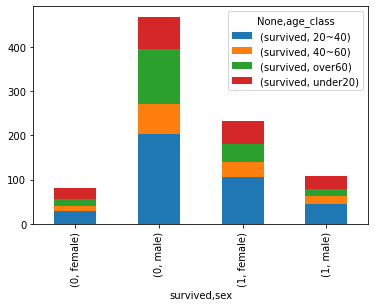

In [283]:
# barplot 그리기, stacked 형태로 그리기
# 데이터프레임에 바로 plot(), hist() 등을 사용하면 실제로 그려줍니다.
age_classed_data.unstack(0).plot(kind='bar', stacked=True)

In [ ]:
barplot_data = age_classed_data.unstack

#### 성별별 생존자, 탑승표 등급별 생존자 분석

In [278]:
# 탑승표 등급별 생존자를 시각화해주세요.
# 1. 생존자와 사망자를 탑승표로 분류해서 가공합니다.
# 2. 차트로 만들어주세요. 
pclassed_data = data.groupby(['pclass','survived'])[['survived']].count().copy()

<AxesSubplot:xlabel='survived'>

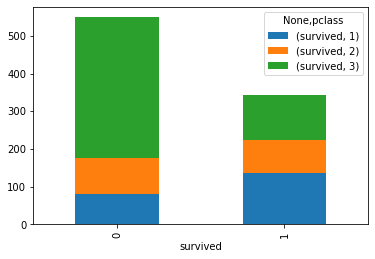

In [279]:
# x축엔 생존여부(row 내지는 index에 survived가 와야함)
# y축에는 탑승표 종류(columns에 pclass가 와야함)
pclassed_data.unstack(0).plot(kind='bar', stacked=True)